Ref: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b <br>
https://github.com/emm792/DS-GA-1001-Project

In [3]:
import pandas as pd 
import numpy as np

In [ ]:
# inf_cols = ['total_RX_claim_paid_cost_other','total_RX_claim_paid_paid_other','total_RX_claim_paid_cost_opioid',
#             'fully_paid_claim_charge','fully_paid_claim_paid','fully_paid_claim_responsible',
#            'cad_charge','chf_charge','surgery_charge','surgery_paid','surgery_responsible']

# processed_feature_raw = pd.read_csv('processed_feature_raw.csv')

# all_id = processed_feature_raw.id.values.tolist()
# part_id = toreplace.id.values.tolist()

# count = 0
# for uid in part_id:
#     if uid not in all_id:
#         print(uid)
#         count +=1
# print(count)

# toreplace = pd.read_csv('toreplace.csv')

# processed_feature_raw.loc[processed_feature_raw.id.isin(toreplace.id),inf_cols]= toreplace[inf_cols].values

# nans(processed_feature_raw)

# processed_feature_raw.loc[processed_feature_raw.id=='ID14308621787', 'fully_paid_claim_charge'] = 143737.52

# processed_feature_raw.to_csv('processed_feature.csv')

### EDA

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier
import pprint
import sklearn.preprocessing as prep 
from sklearn.feature_selection import mutual_info_classif
from sklearn import feature_selection
from sklearn import linear_model
import seaborn as sns
from scipy import linalg
%matplotlib inline

In [4]:
raw_df = pd.read_csv('final_data.csv')

In [5]:
raw_df.shape

(13990, 58)

In [6]:
# y is 'label'
raw_df = raw_df.drop(columns = ['Unnamed: 0'])
raw_df.head()

,id,total_RX_claim_paid_other,total_RX_claim_paid_cost_other,total_RX_claim_paid_paid_other,total_RX_claim_paid_opioid,total_RX_claim_paid_cost_opioid,total_RX_claim_paid_paid_opioid,total_RX_claim_paid_supply_opioid,total_RX_claim_paid_quantity_opioid,total_RX_claim_paid_MME_opioid,...,chf,chf_charge,chf_paid,chf_responsible,surgery,surgery_charge,surgery_paid,surgery_responsible,label,total_RX_claim_rejected
0,ID10010854159,75,1334.00000,1169.00000,0,0.0000,0.000000,0.0,0.0,0.000,...,0,0.00000,0.0,0.0,1,2314.000000,619.000000,250.0,0,21
1,ID10013863216,5,85.93750,65.93750,0,0.0000,0.000000,0.0,0.0,0.000,...,0,0.00000,0.0,0.0,1,12336.000000,1397.000000,275.0,1,0
2,ID10024447278,55,963.50000,926.00000,3,21.4375,11.546875,15.0,40.0,60.000,...,0,0.00000,0.0,0.0,0,0.000000,0.000000,0.0,1,24
3,ID1002482139,116,294.47998,294.47998,28,0.0000,720.500000,789.0,2895.0,1043.125,...,0,646.98999,0.0,0.0,1,0.000000,0.000000,0.0,1,107
4,ID1003386406,39,342816.06250,317764.53125,1,0.0000,3.160156,3.0,20.0,50.000,...,0,0.00000,0.0,0.0,0,19997.730469,2138.969971,980.0,0,26


In [9]:
Y = raw_df['label']
ids = raw_df['id']
X_no_id = raw_df.drop(['id','label'],1) # drop X id for now 

In [10]:
# normalize features
X_norm = prep.scale(X_no_id, axis = 0, with_mean = True, with_std = True)
X_norm = pd.DataFrame(X_norm,index = X.index, columns = X.columns)

/Users/lexili24/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [11]:
# X_norm.isnull().sum()

In [11]:
Y.value_counts()
# This is a balanced dataset

0    7371
1    6619
Name: label, dtype: int64

In [12]:
X_norm.head()

,total_RX_claim_paid_other,total_RX_claim_paid_cost_other,total_RX_claim_paid_paid_other,total_RX_claim_paid_opioid,total_RX_claim_paid_cost_opioid,total_RX_claim_paid_paid_opioid,total_RX_claim_paid_supply_opioid,total_RX_claim_paid_quantity_opioid,total_RX_claim_paid_MME_opioid,total_RX_claim_new_other,...,cpd_responsible,chf,chf_charge,chf_paid,chf_responsible,surgery,surgery_charge,surgery_paid,surgery_responsible,total_RX_claim_rejected
0,-0.102879,-0.275971,-0.251981,-0.547233,-0.164455,-0.117124,-0.565347,-0.497143,-0.246655,0.345918,...,-0.021064,-0.291837,-0.065778,-0.052575,-0.040884,0.047201,-0.266701,-0.194977,0.017696,-0.118623
1,-1.108508,-0.341157,-0.312160,-0.547233,-0.164455,-0.117124,-0.565347,-0.497143,-0.246655,-0.849121,...,-0.021064,-0.291837,-0.065778,-0.052575,-0.040884,0.047201,-0.033426,0.009273,0.025756,-0.932577
2,-0.390201,-0.295322,-0.265238,-0.249327,-0.148072,-0.107469,-0.504365,-0.459012,-0.198103,-0.507681,...,-0.021064,-0.291837,-0.065778,-0.052575,-0.040884,-0.461150,-0.320562,-0.357485,-0.062905,-0.002344
3,0.486133,-0.330265,-0.299692,2.233222,-0.164455,0.485325,2.642337,2.262603,0.597446,2.394556,...,-0.021064,-0.291837,0.578542,-0.052575,-0.040884,0.047201,-0.320562,-0.357485,-0.062905,3.214712
4,-0.620059,17.559545,17.020285,-0.447931,-0.164455,-0.114482,-0.553151,-0.478077,-0.206195,0.175198,...,-0.021064,-0.291837,-0.065778,-0.052575,-0.040884,-0.461150,0.144911,0.204065,0.253053,0.075176


### Mutual Information

In [13]:
feature_scores = mutual_info_classif(X_norm, Y)

In [14]:
def get_plot(X, value, label):
    keys = X.columns.values.tolist()
    dict_value = dict(zip(keys,value))
    dict_value = sorted(dict_value.items(), key = lambda kv: kv[1], reverse = True)
    %matplotlib inline
    plt.rcParams['figure.figsize'] = 24, 24
    plt.bar(*zip(*dict_value))
    ax = plt.gca()
    plt.setp(ax.get_xticklabels(), rotation = 30, horizontalalignment = 'right')
    plt.ylabel(label)
    return(dict_value)

[('total_RX_claim_paid_supply_opioid', 0.12390130328740834),
 ('total_RX_claim_paid_quantity_opioid', 0.12077639867400025),
 ('total_RX_claim_paid_opioid', 0.09709020731018114),
 ('total_RX_claim_paid_MME_opioid', 0.09185300041187583),
 ('total_RX_claim_paid_paid_opioid', 0.07935345433159835),
 ('total_RX_claim_paid_cost_opioid', 0.06749288346200188),
 ('total_RX_claim_new_supply_opioid', 0.014323052364806577),
 ('total_RX_claim_new_opioid', 0.01297702625764674),
 ('total_RX_claim_new_quantity_opioid', 0.011547912115709602),
 ('total_RX_claim_paid_other', 0.010584295238053931),
 ('total_RX_claim_rejected', 0.010427650435416158),
 ('total_RX_claim_paid_paid_other', 0.00820364745192359),
 ('hypertension_paid', 0.007896715905199692),
 ('chf_charge', 0.007536019343077127),
 ('diabetes', 0.007340957022595296),
 ('top_five_responsible', 0.0068269248335364185),
 ('total_RX_claim_mail_quantity_opioid', 0.006584322223981864),
 ('chf_responsible', 0.006177345832115488),
 ('total_RX_claim_mail_su

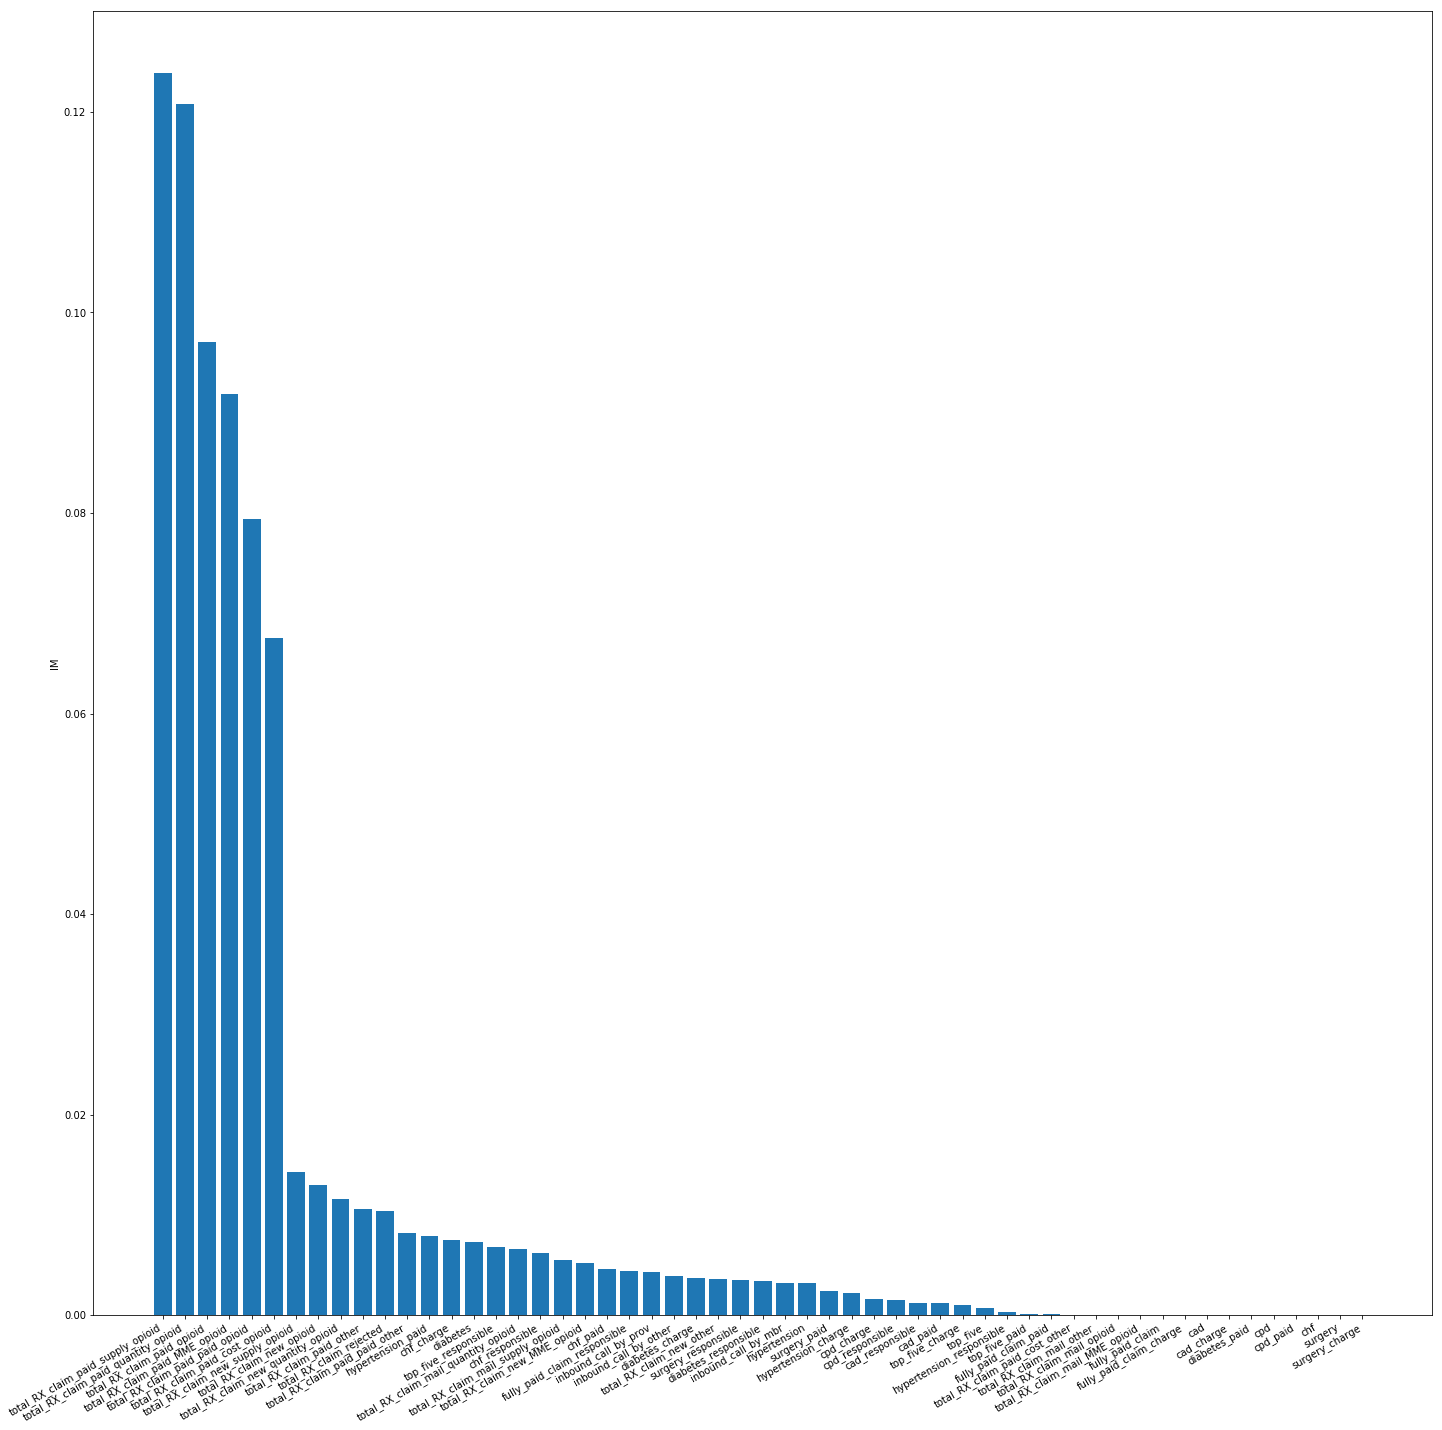

In [15]:
get_plot(X_norm, feature_scores, 'IM')


Note: Higher the IM is, the more information of Y is given by this attribute
top 5: 'Total_RX_claim_paid_supply_opioid', 'total_RX_claim_paid_quantity_opioid','total_RXclaim_paid_opioid','total_RX_claim_paid_MME_opioid',

### Lasso 

From Lasso, we can see that this model is highly correlated with attribute 'total_RX_claim_paid_supply_opioid'

In [16]:
# feature importance through Lasso
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

reg = LassoCV()
reg.fit(X_norm, Y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_norm, Y))
coef = pd.Series(reg.coef_, index = X.columns)

/Users/lexili24/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 0.004239
Best score using built-in LassoCV: 0.170679


In [17]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 22 variables and eliminated the other 33 variables


In [18]:
# For Lasso coefficient, we only care wether it is nonzero or not
# If coef is nonzero: keep this attribute
# If it is zero: remove this attribute

In [19]:
# list of feature selected by Lasso
selected = coef[coef != 0]

In [20]:
selected

total_RX_claim_paid_paid_other       0.000852
total_RX_claim_paid_paid_opioid     -0.002720
total_RX_claim_paid_supply_opioid    0.195194
total_RX_claim_paid_MME_opioid      -0.005152
total_RX_claim_new_other            -0.020142
total_RX_claim_new_supply_opioid     0.025763
total_RX_claim_mail_opioid           0.002198
total_RX_claim_mail_supply_opioid    0.000269
inbound_call_by_mbr                  0.004055
inbound_call_by_other                0.007388
inbound_call_by_prov                 0.002769
fully_paid_claim                    -0.036803
fully_paid_claim_paid               -0.009267
top_five                            -0.002660
top_five_charge                     -0.000892
cad_paid                             0.001337
cpd                                  0.004829
cpd_charge                           0.005717
cpd_paid                             0.000238
cpd_responsible                      0.000462
surgery                             -0.001883
total_RX_claim_rejected           

In [60]:
# list of feature dropped by Lasso
dropped = coef[coef == 0]
dropped

total_RX_claim_paid_other              0.0
total_RX_claim_paid_cost_other         0.0
total_RX_claim_paid_opioid            -0.0
total_RX_claim_paid_cost_opioid        0.0
total_RX_claim_paid_quantity_opioid    0.0
total_RX_claim_new_opioid             -0.0
total_RX_claim_new_quantity_opioid     0.0
total_RX_claim_new_MME_opioid          0.0
total_RX_claim_mail_other              0.0
total_RX_claim_mail_quantity_opioid    0.0
total_RX_claim_mail_MME_opioid         0.0
fully_paid_claim_charge               -0.0
fully_paid_claim_responsible           0.0
top_five_paid                         -0.0
top_five_responsible                   0.0
cad                                   -0.0
cad_charge                             0.0
cad_responsible                        0.0
diabetes                               0.0
diabetes_charge                        0.0
diabetes_paid                          0.0
diabetes_responsible                   0.0
hypertension                          -0.0
hypertensio

Text(0.5, 1.0, 'Feature importance using Lasso Model')

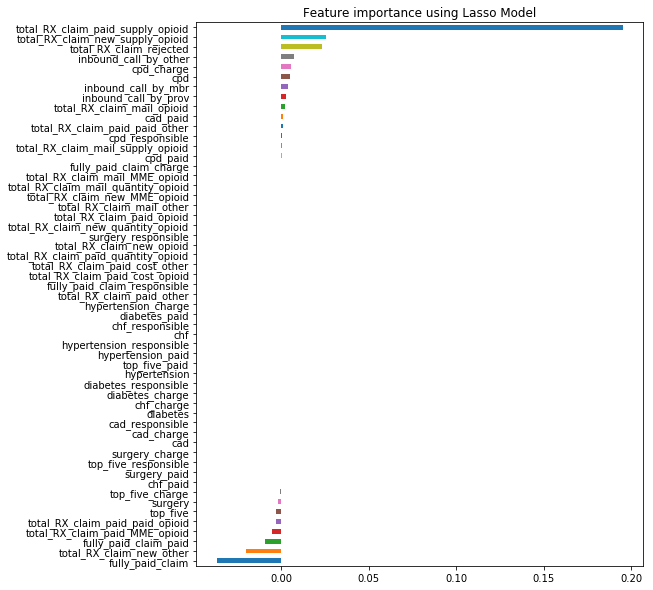

In [21]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

The attributes shows 0 Feature Importance in the graph are suggested to be eliminated by Lasso

## Backward elimination
reference: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [36]:
# Backward elimination: with a number greater that p value of 0.05 means no 
# correlation between that attribute with y
import statsmodels.api as sm
X_1 = sm.add_constant(X_norm)
model = sm.OLS(Y,X_1).fit()
pvalues = model.pvalues

In [37]:
# Higher the value is, more likely to be unrelated with Y by OLS
pvalues.sort_values()

const                                  0.000000e+00
total_RX_claim_paid_supply_opioid      1.905229e-67
fully_paid_claim                       9.343217e-15
total_RX_claim_new_other               1.127304e-07
total_RX_claim_rejected                1.369095e-07
total_RX_claim_new_supply_opioid       1.122950e-05
total_RX_claim_paid_paid_other         2.218282e-04
total_RX_claim_paid_cost_other         3.211309e-04
total_RX_claim_paid_opioid             2.155828e-03
cpd                                    5.224659e-03
inbound_call_by_prov                   8.404625e-03
inbound_call_by_other                  2.009077e-02
total_RX_claim_new_MME_opioid          2.382839e-02
fully_paid_claim_paid                  3.070746e-02
top_five                               3.114758e-02
total_RX_claim_paid_MME_opioid         3.425529e-02
total_RX_claim_paid_quantity_opioid    5.680321e-02
cpd_charge                             7.204767e-02
total_RX_claim_new_opioid              7.266317e-02
total_RX_cla

In [43]:
# removing each parameter one by one

cols = list(X_norm.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_norm[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(Y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
        
BE_list = cols
print(BE_list)

['total_RX_claim_paid_cost_other', 'total_RX_claim_paid_paid_other', 'total_RX_claim_paid_opioid', 'total_RX_claim_paid_supply_opioid', 'total_RX_claim_new_other', 'total_RX_claim_new_supply_opioid', 'inbound_call_by_other', 'inbound_call_by_prov', 'fully_paid_claim', 'fully_paid_claim_paid', 'cpd', 'cpd_charge', 'total_RX_claim_rejected']


### Methods Comparision

In [26]:
lasso_list = selected.index.values.tolist()

In [44]:
for f in BE_list:
    if f not in lasso_list:
        print(f)

total_RX_claim_paid_cost_other
total_RX_claim_paid_opioid


In [45]:
# Final feature list (maybe)
feature_list = lasso_list + ['total_RX_claim_paid_cost_other','total_RX_claim_paid_opioid']

In [46]:
print(feature_list) 

['total_RX_claim_paid_paid_other', 'total_RX_claim_paid_paid_opioid', 'total_RX_claim_paid_supply_opioid', 'total_RX_claim_paid_MME_opioid', 'total_RX_claim_new_other', 'total_RX_claim_new_supply_opioid', 'total_RX_claim_mail_opioid', 'total_RX_claim_mail_supply_opioid', 'inbound_call_by_mbr', 'inbound_call_by_other', 'inbound_call_by_prov', 'fully_paid_claim', 'fully_paid_claim_paid', 'top_five', 'top_five_charge', 'cad_paid', 'cpd', 'cpd_charge', 'cpd_paid', 'cpd_responsible', 'surgery', 'total_RX_claim_rejected', 'total_RX_claim_paid_cost_other', 'total_RX_claim_paid_opioid']


### Correlation among parameters? Covariance matrix

In [47]:
X_sel = X_norm[feature_list]

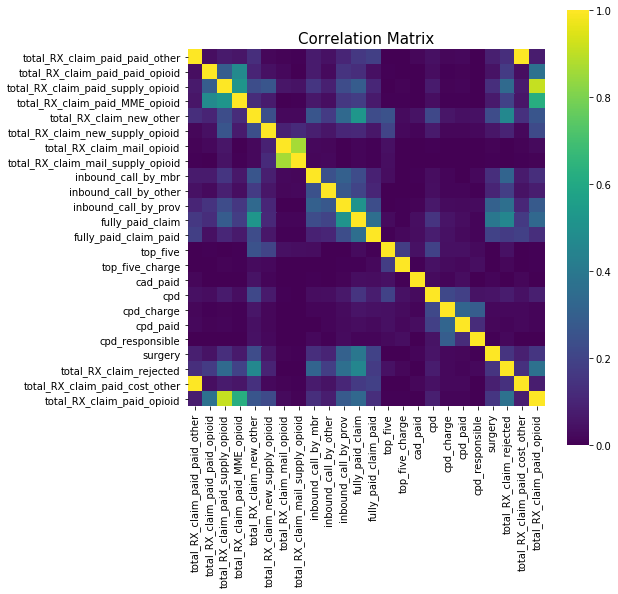

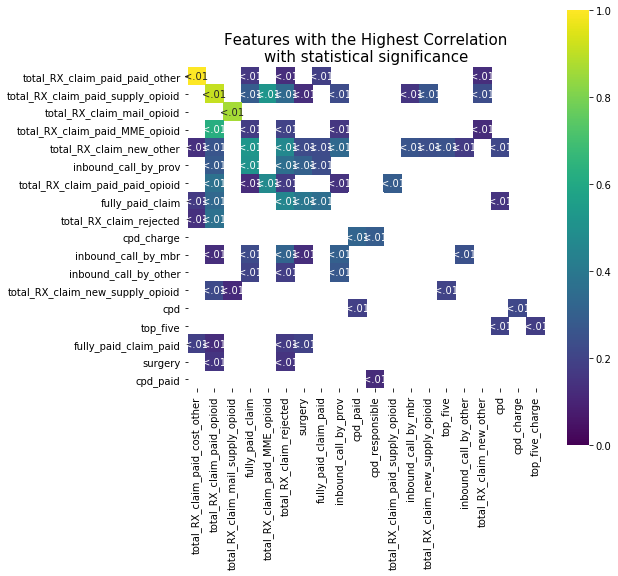

In [49]:
X = X_sel
X = (X - X.mean())/X.std()
corrmatrix = X.corr().abs()

corrmatrix.head()

def plotCorr(df,title="Correlation Matrix",annot=None):
    fig, ax = plt.subplots(figsize=(8,8))
    ax = sns.heatmap(df, annot = annot, vmin=0, vmax=1, fmt="s", cmap='viridis',square=True)
    ax.set_title(title,fontsize=15)

plotCorr(corrmatrix)
#plt.savefig('CorrMatrix.png', bbox_inches='tight')

corrmatrix_half = corrmatrix.where(np.triu(np.ones(corrmatrix.shape)).astype(np.bool))
reduced_by_corr = corrmatrix_half.stack().sort_values(ascending=False)[len(X.columns):100].drop_duplicates()
reduced_matrix = reduced_by_corr.unstack()
reduced_matrix.shape

from scipy.stats import pearsonr
def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = pearsonr(df[r], df[c])[1]
    return pvalues

pval = calculate_pvalues(X)

reduced_pval = pd.DataFrame(columns=reduced_matrix.columns,index=reduced_matrix.index)
for i in reduced_matrix.index:
    for j in reduced_matrix.columns:
        reduced_pval.loc[i,j] = pval.loc[j,i]

reduced_pval = reduced_pval.mask(reduced_pval<0.01,'<.01')
reduced_pval.shape


plotCorr(reduced_by_corr.unstack(),'Features with the Highest Correlation\nwith statistical significance',reduced_pval)
plt.savefig('CorrFigwithStatsSig.png', bbox_inches='tight')

### Bonus: How many parameters are enough?
Although it is a model to model question, here is one example we can found the 
best number of parameters if we were going to use LR

In [53]:
# We can use this to find the best number of parameters we need 
# to output the highest accuracy with LR model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
nof_list=np.arange(1,15)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X_norm,Y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 12
Score with 12 features: 0.175017
